# Import Modules and Load Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
dataset=pd.read_csv(r'E:\python\project\creditcard.csv')
Row, Col = dataset.shape
print(f'There are {Row} rows and {Col} columns')
pd.options.display.max_columns = None
dataset.head()

There are 284807 rows and 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Analyzing The Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

here is no missing data in the entire dataset.

In [ ]:
print(pd.Series(dataset["Class"]).value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


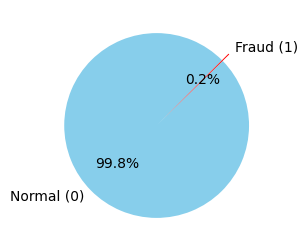

In [4]:
distribution = dataset['Class'].value_counts(normalize=True) * 100

plt.figure(figsize=(3, 3))
distribution.plot.pie(
    autopct='%1.1f%%',  
    labels=['Normal (0)', 'Fraud (1)'],  
    colors=['skyblue', 'red'], 
    startangle=45, 
    explode=[0, 0.1],  
)
plt.ylabel('') 
plt.show()

the dataset is highly imbalanced, with the majority class (0) comprising 99.8% and the minority class (1) only 0.2% of the data that requiring balancing techniques for better model performance.

##### Analyzing The Correlated Features

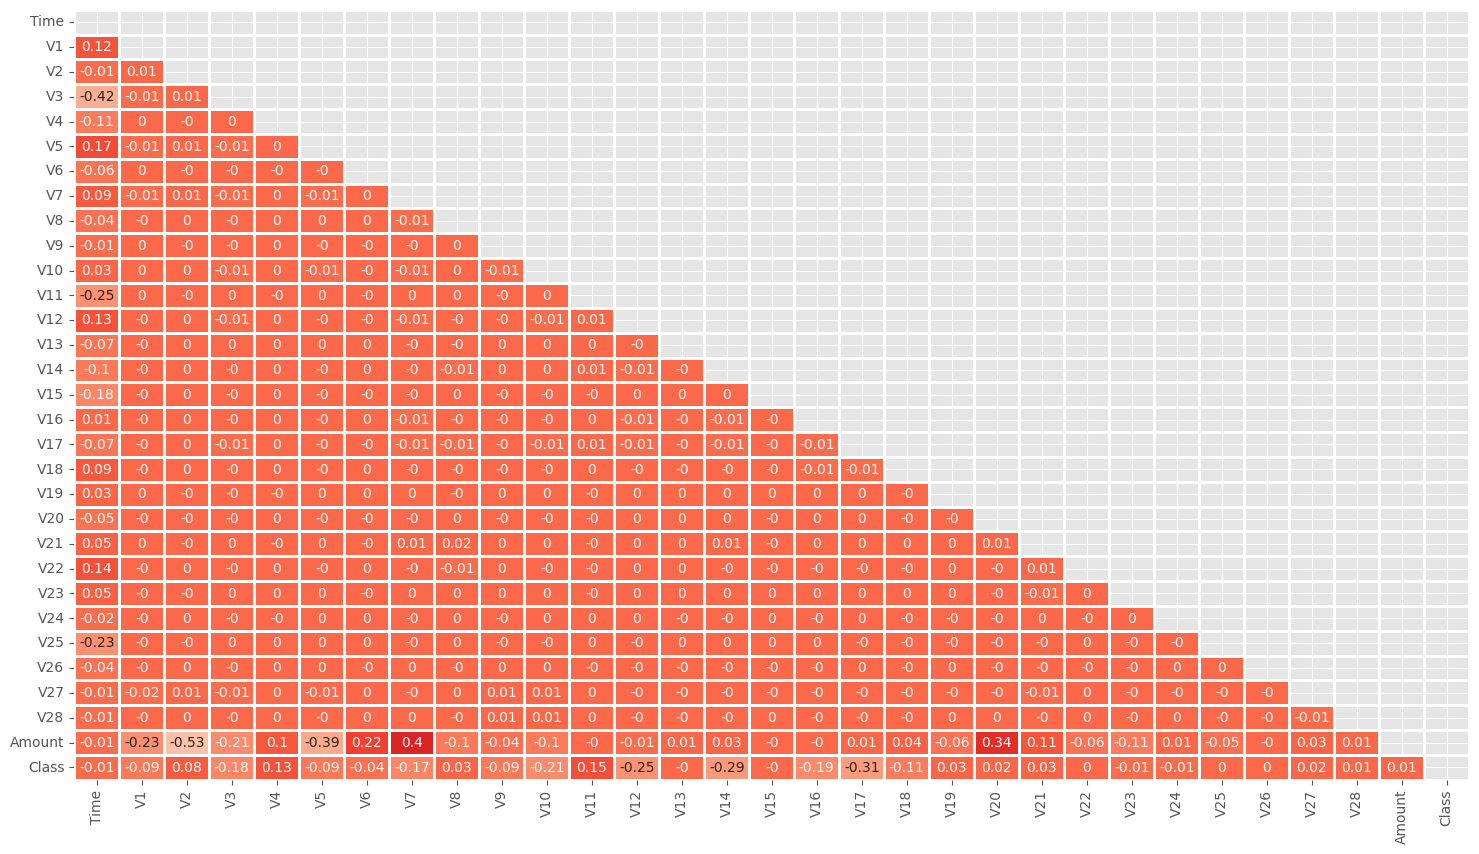

In [7]:
def corrMat(df,id=False):
    
    corr_mat = df.select_dtypes(include=[np.number]).corr().round(2)
    f, ax = plt.subplots(figsize=(18,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='Reds',square=False,lw=2,annot=True,cbar=False);plt.show()  


corrMat(dataset)

there is no notable correlation between features.

### analyze data in different transaction classes

In [10]:
print(dataset.duplicated().sum())
duplicates = dataset[dataset.duplicated()]
duplicate_counts_per_class = duplicates.groupby("Class").size()
print("duplicated record in each class:")
print(duplicate_counts_per_class)

1081
duplicated record in each class:
Class
0    1062
1      19
dtype: int64


In [12]:
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

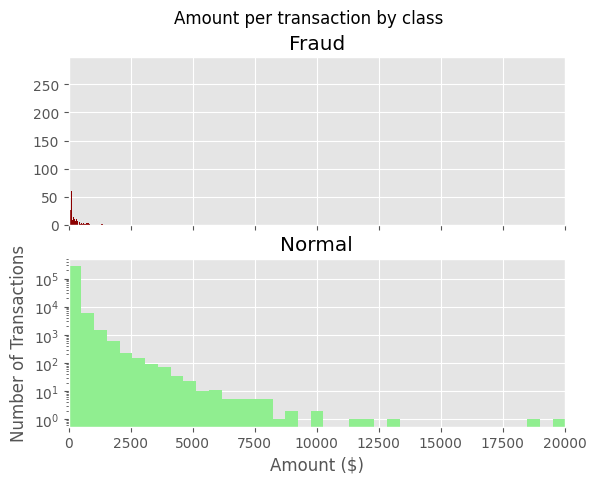

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,color='darkred')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='lightgreen')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

Fraudulent transactions tend to be smaller, whereas normal transactions, while also mostly small, show a wider range of values.

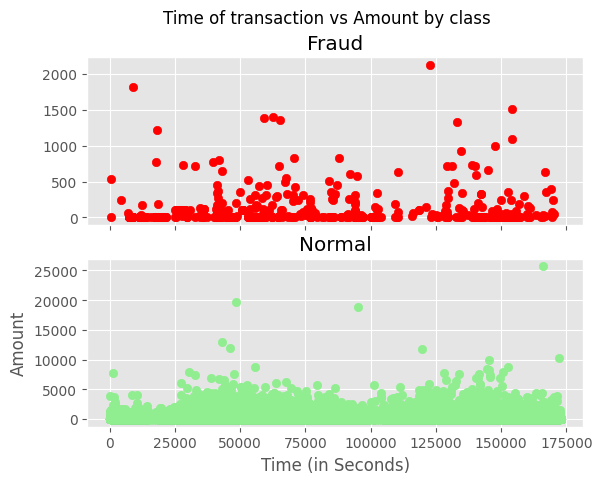

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color='red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='lightgreen')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Fraudulent transactions don't follow a regular pattern and are more common during certain times. Normal transactions, on the other hand, happen consistently over time.

In [11]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

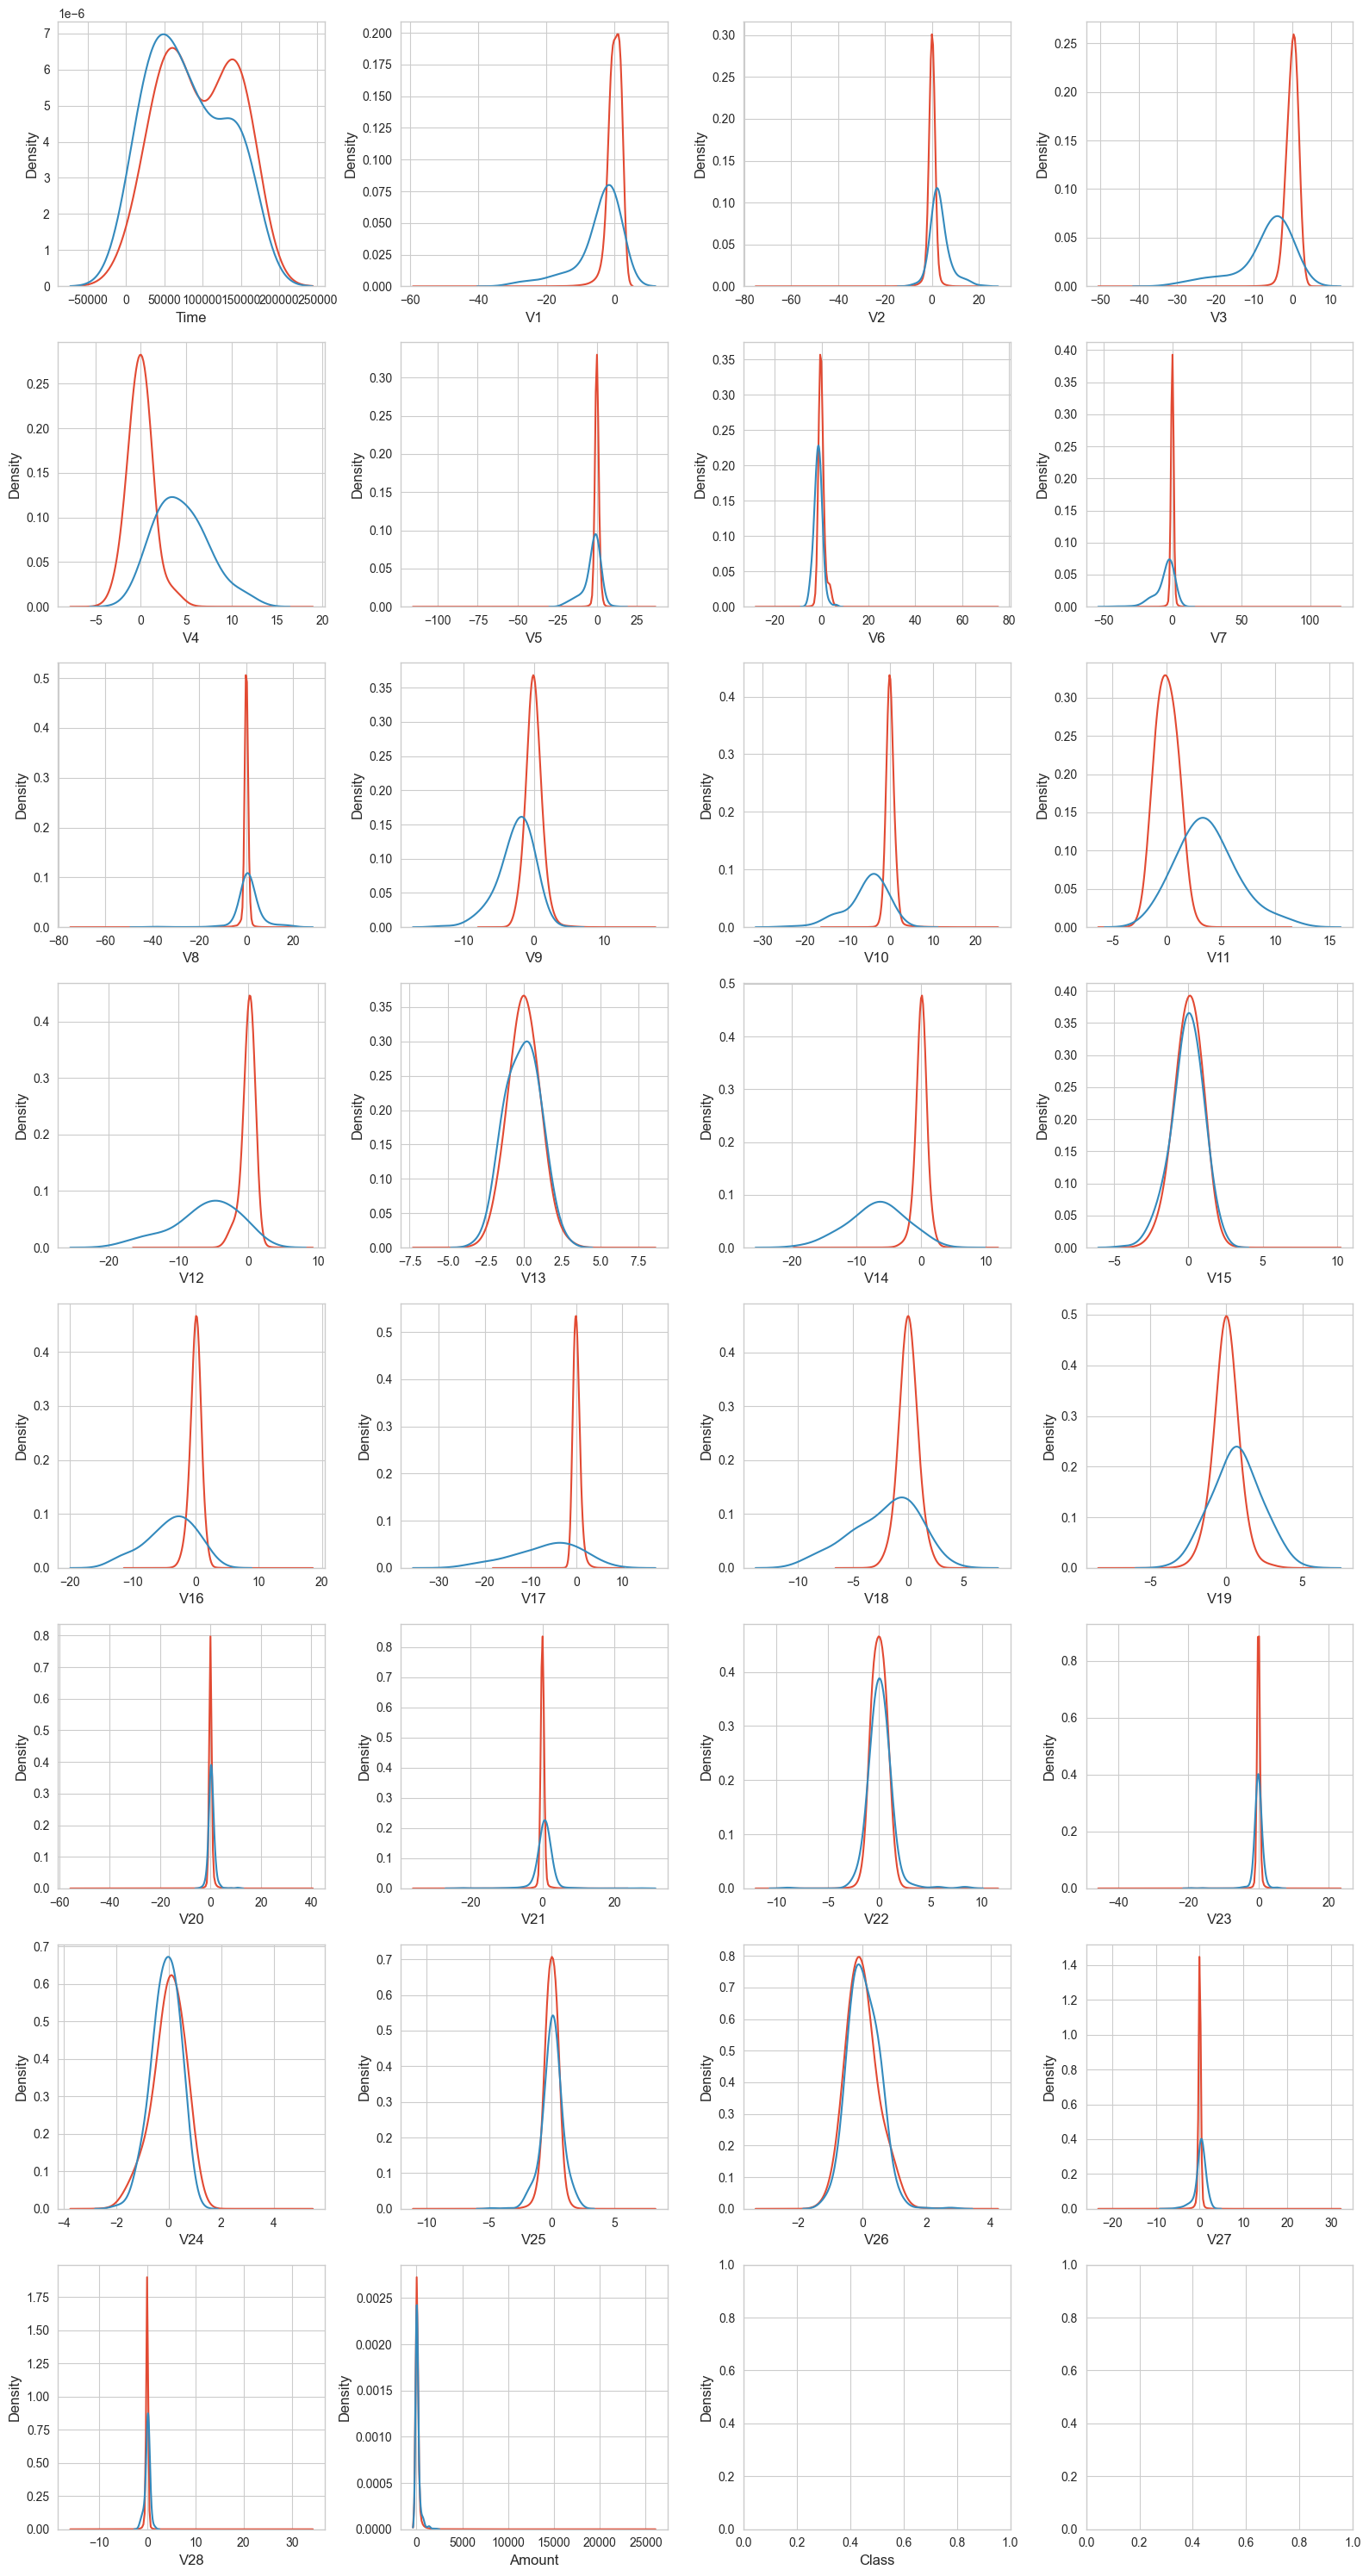

In [21]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(8, 4, figsize=(16, 30))
axes = axes.flatten() 

for i, feature in enumerate(dataset.columns):
    sns.kdeplot(normal[feature], bw=0.5, label="Class = 0", ax=axes[i])
    sns.kdeplot(fraud[feature], bw=0.5, label="Class = 1", ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)


plt.tight_layout()
plt.show()

 Several features, such as V4, V11, and V14, demonstrate notable distributional differences between the two classes, suggesting their potential utility in fraud detection models. Conversely, some features like V25,V26 and Time appear to have similar distributions regardless of class.

In [13]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

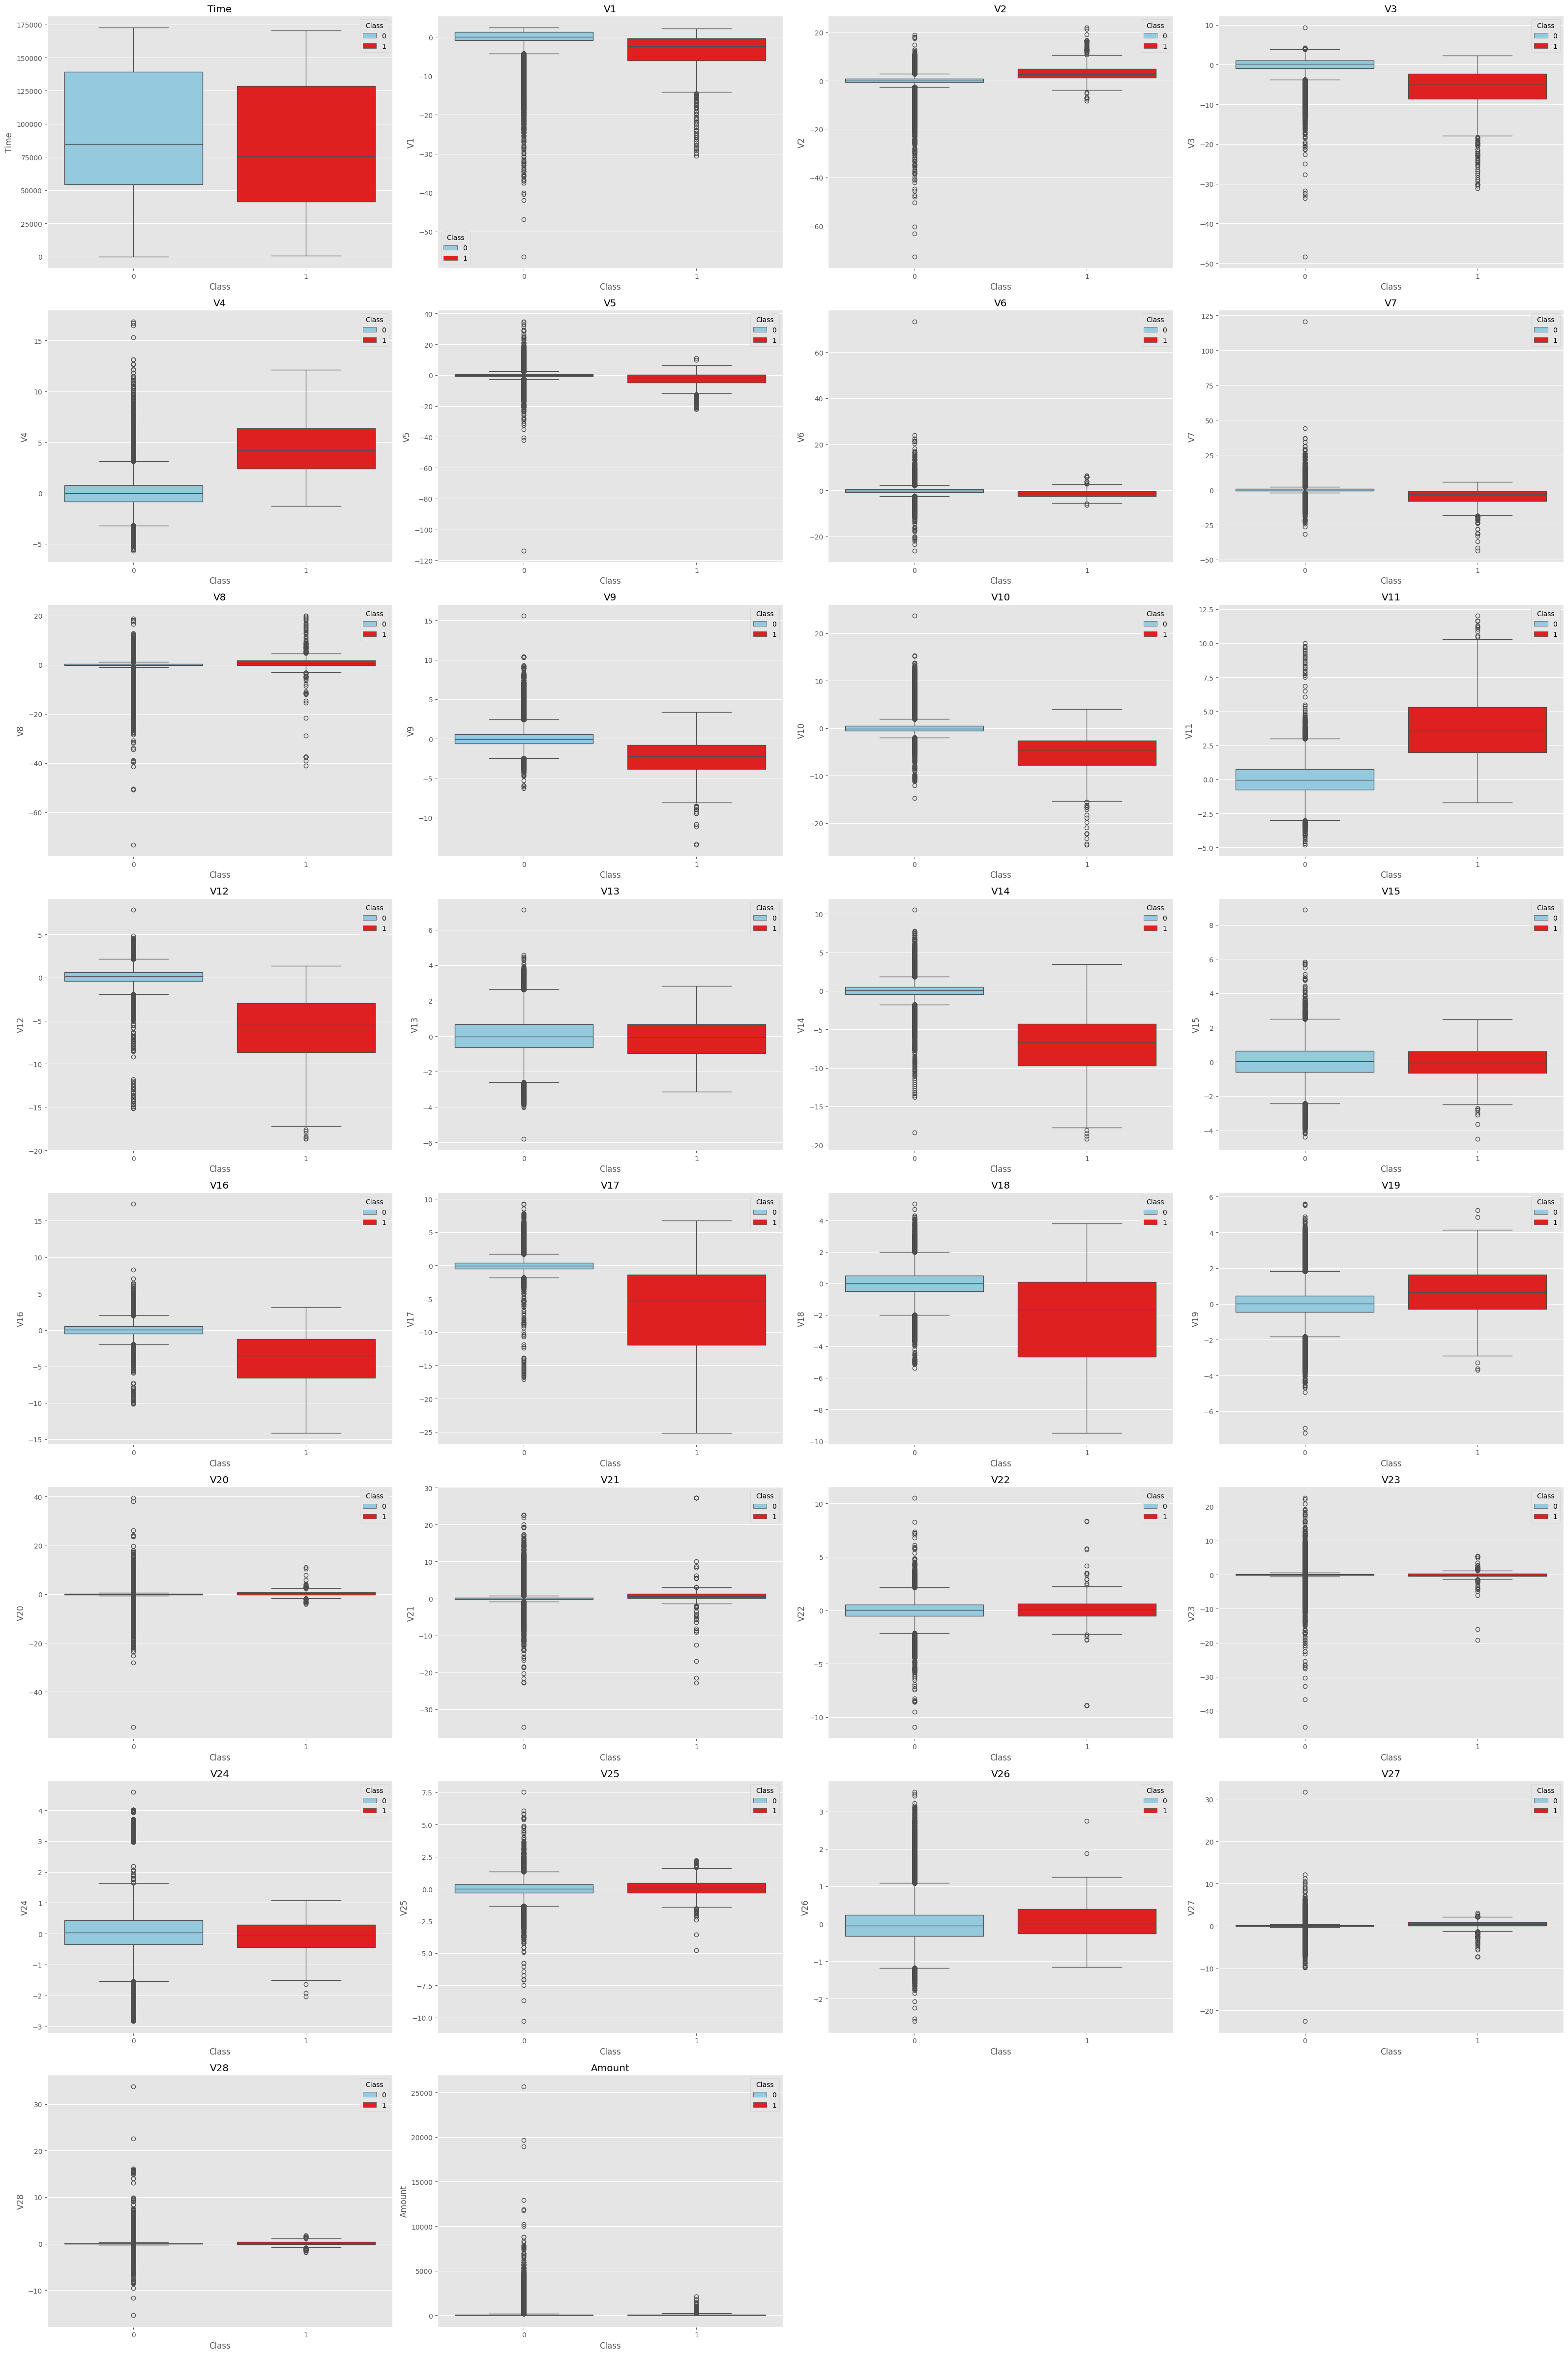

In [4]:
#Outliers
num_columns = len(X.columns)
ncols = 4  
nrows = int(np.ceil(num_columns / ncols)) 

plt.figure(figsize=(ncols * 8, nrows * 6))  

for i, column in enumerate(X.columns):
    plt.subplot(nrows, ncols, i + 1) 
    sns.boxplot(x=y, y=X[column], hue=y,palette={0: "skyblue", 1: "red"})  
    plt.title(column)  
    plt.xlabel('Class')  
    plt.ylabel(column) 

plt.tight_layout() 
plt.show()

In fraud detection datasets, it may be beneficial to retain duplicate and outlier data, as they could represent meaningful patterns associated with fraudulent activities. Removing them might lead to the loss of potentially valuable information that could improve model performance. Using robust models like Random Forest, CatBoost, and XGBoost can be a suitable approach, as they are generally resilient to noise and imbalanced data, potentially capturing complex fraud patterns more effectively.

In [14]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((227845, 30), (56962, 30))

#### RandomForest model

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=110, max_features=3,random_state=42)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_features=3, n_estimators=110, random_state=42)

In [65]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56860     4]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.82      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Text(0.5, 1.0, 'Feature Importance RandomForest')

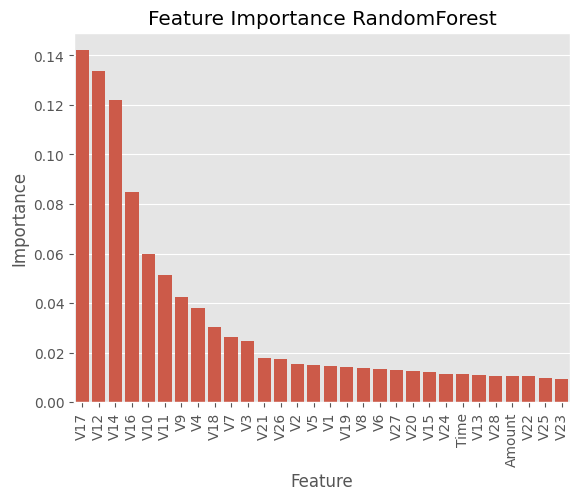

In [66]:
feat_import = pd.DataFrame({'Feature': X_train.columns, 'Importance': classifier.feature_importances_})
feat_import = feat_import.sort_values(by='Importance', ascending=False)

sns.barplot(x='Feature', y='Importance', data=feat_import)
plt.xticks(rotation=90)
plt.title('Feature Importance RandomForest')

#### xgboost model

In [17]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=110, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")


[[56856     8]
 [   17    81]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.83      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost Confusion Matrix:


Text(0.5, 1.0, 'Feature Importance XGBoost')

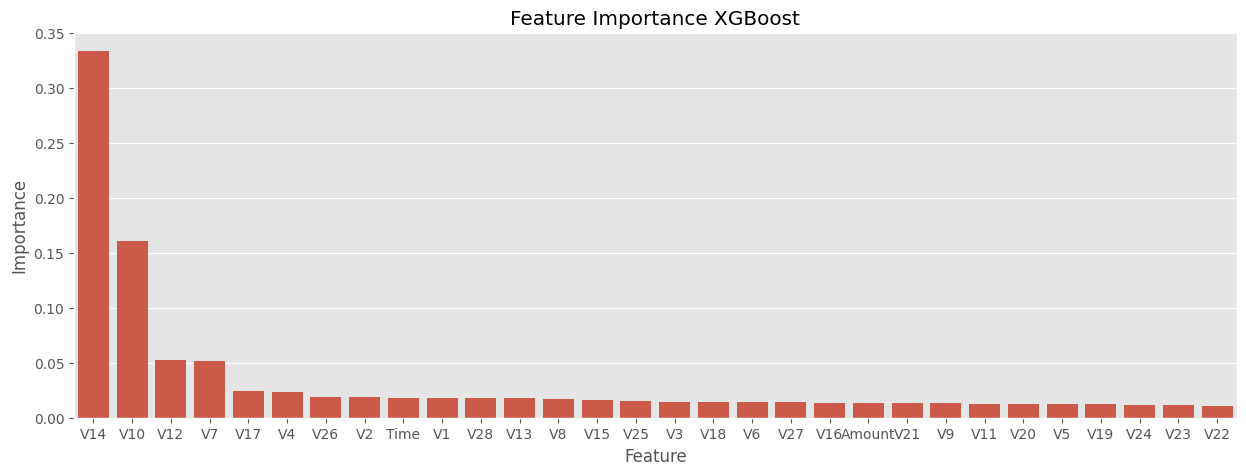

In [18]:
feat_import_xgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
feat_import_xgb = feat_import_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='Importance', data=feat_import_xgb)
plt.title('Feature Importance XGBoost')

[[56861     3]
 [   20    78]]
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.80      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

CatBoost Confusion Matrix:


Text(0.5, 1.0, 'Feature Importance CatBoost')

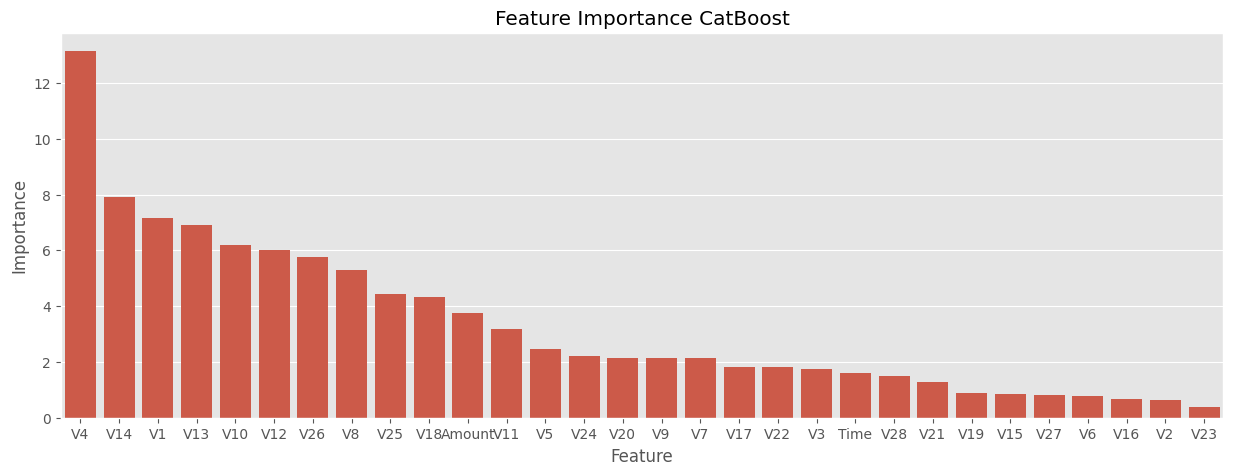

In [19]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, random_seed=42, verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_cat))
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))
print("CatBoost Confusion Matrix:")


feat_import_cat = pd.DataFrame({'Feature': X_train.columns, 'Importance': cat_model.feature_importances_})
feat_import_cat = feat_import_cat.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(x='Feature', y='Importance', data=feat_import_cat)
plt.title('Feature Importance CatBoost')


### Create Model and Evaluate

In [21]:
X_train_selected = X_train[['V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V9','V4', 'V18', 'V7', 'V3']]
X_test_selected = X_test[['V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V9','V4', 'V18', 'V7', 'V3']]


In [22]:
print(pd.Series(y_test).value_counts())

Class
0    56864
1       98
Name: count, dtype: int64


Epoch 1/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9886 - auc: 0.8904 - loss: 0.2862 - val_accuracy: 0.9994 - val_auc: 0.9353 - val_loss: 0.2686 - learning_rate: 5.0000e-04
Epoch 2/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - auc: 0.9326 - loss: 0.2681 - val_accuracy: 0.9994 - val_auc: 0.9291 - val_loss: 0.2697 - learning_rate: 5.0000e-04
Epoch 3/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - auc: 0.9380 - loss: 0.2678 - val_accuracy: 0.9994 - val_auc: 0.9193 - val_loss: 0.2685 - learning_rate: 5.0000e-04
Epoch 4/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9993 - auc: 0.9405 - loss: 0.2678 - val_accuracy: 0.9994 - val_auc: 0.9696 - val_loss: 0.2706 - learning_rate: 5.0000e-04
Epoch 5/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9993 - auc: 0.9290 - loss: 0.2678 - val_accuracy: 0.9994 - val_auc: 0.9592 - val_loss: 0.2690 - learning_rate: 5.0000e-04
Epoch 6/50
5697/5697 ━━━━━━━━━━━━━━━━━━━━ 14s

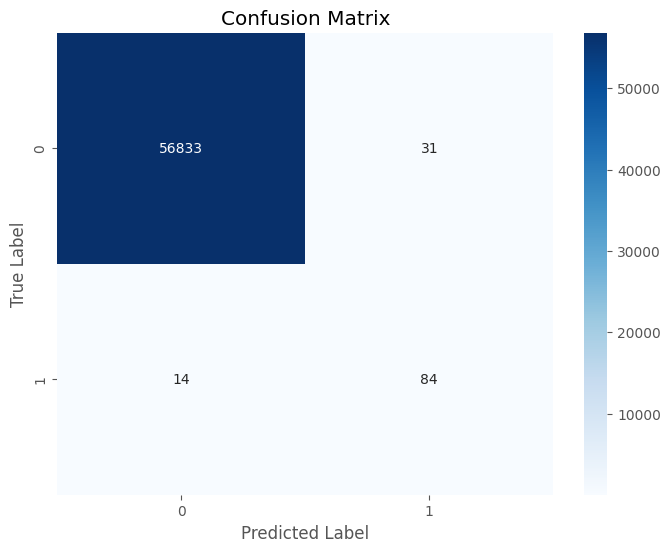

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step


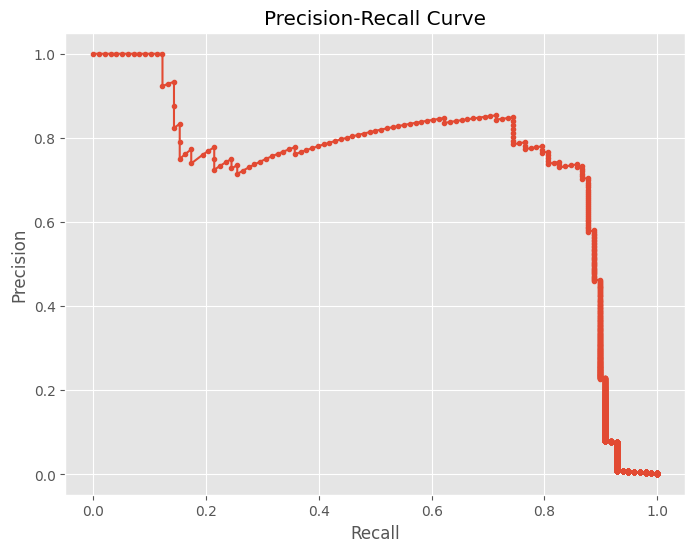

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve

def create_model(input_shape=11):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.BatchNormalization(),
        
        layers.Dense(128),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        
        layers.Dense(64),
        layers.LeakyReLU(alpha=0.1),
        layers.BatchNormalization(),
        
        layers.Dense(32),
        layers.LeakyReLU(alpha=0.1),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.15),
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

def prepare_data(X_train, X_test):
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_model(model, X_train_scaled, y_train, validation_split=0.2, epochs=50):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_auc',
            patience=10,
            restore_best_weights=True,
            mode='max'
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_auc',
            factor=0.5,
            patience=10,
            min_lr=1e-6
        )
    ]
    
    history = model.fit(
        X_train_scaled, y_train,
        validation_split=validation_split,
        epochs=epochs,
        batch_size=32,
        callbacks=callbacks,
        verbose=1
    )
    return history

def find_best_threshold(y_true, y_pred_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

def evaluate_model(model, X_test_scaled, y_test):
    y_pred_proba = model.predict(X_test_scaled)
    best_threshold = find_best_threshold(y_test, y_pred_proba)
    y_pred_classes = (y_pred_proba > best_threshold).astype(int)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
    
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_precision_recall(y_true, y_pred_proba):
    precisions, recalls, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

def main():
    X_train_scaled, X_test_scaled = prepare_data(X_train_selected, X_test_selected)
    model = create_model(input_shape=X_train_scaled.shape[1])
    history = train_model(model, X_train_scaled, y_train)
    evaluate_model(model, X_test_scaled, y_test)
    plot_precision_recall(y_test, model.predict(X_test_scaled))

if __name__ == "__main__":
    main()